#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**

using the hotels-europe dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-europe/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-europe-compare/"
output = dirname + "da_case_studies/ch03-hotels-europe-compare/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions 
from py_helper_functions import *

#### Load in clean and tidy data and create workfile

In [4]:
hotels_europe_price=pd.read_csv(data_in+"hotels-europe_price.csv")
hotels_europe_features=pd.read_csv(data_in+"hotels-europe_features.csv")

In [5]:
hotels_europe = pd.merge(hotels_europe_price,hotels_europe_features,how="left",on="hotel_id")
del hotels_europe_price
del hotels_europe_features

#### Filter for same Vienna data we used + London same date

In [6]:
hotels_europe_cut = hotels_europe.loc[
    lambda x: (x["year"] == 2017)
    & (x["month"] == 11)
    & (x["weekend"] == 0)
    & (x["city"].isin(["Vienna", "London"]))
    & (x["accommodation_type"] == "Hotel")
    & (x["stars"] >= 3)
    & (x["stars"] <= 4)
    & (x["stars"].notna())
    & (x["city_actual"].isin(["Vienna", "London"]))
    & (x["price"] <= 600)
]

In [7]:
hotels_europe_cut.price.max()

491

In [8]:
hotels_europe_cut.groupby("city").agg(
    mean_price=("price", "mean"), max=("price", "max"), n=("price", "size")
)

,mean_price,max,n
city,,,
London,202.356322,491,435
Vienna,109.975845,383,207


### Figure 3.6 The distribution of hotel price in Vienna and London

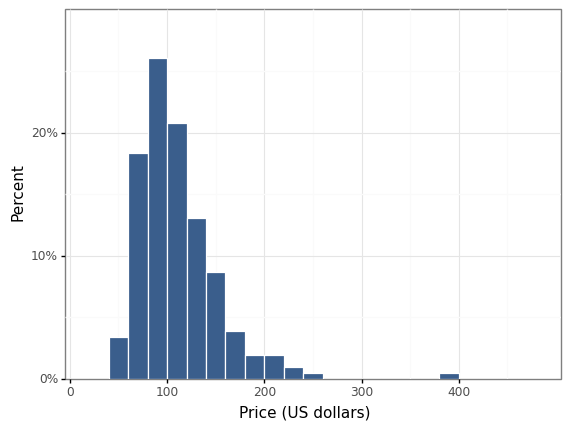

<ggplot: (322920126)>

In [9]:
ggplot(hotels_europe_cut.query('city=="Vienna"'), aes(x="price")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    binwidth=20,
    fill=color[0],
    color="#FFFFFF",
    boundary=0,
    closed="left",
) + labs(x="Price (US dollars)", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 500), breaks=seq(0, 500, by=100)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.3),
    breaks=seq(0, 0.3, by=0.1),
    labels=percent_format(),
) + theme_bw()

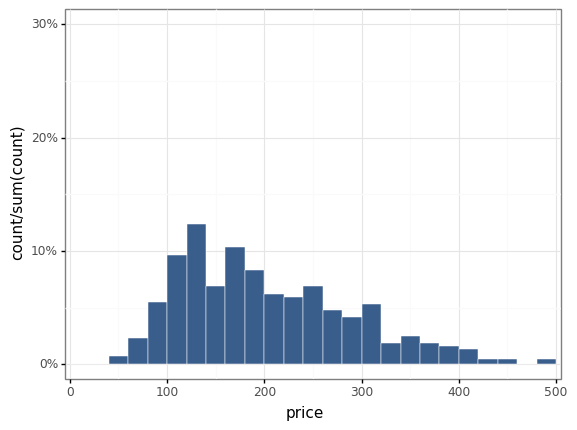

<ggplot: (323185731)>

In [10]:
# London
ggplot(
    hotels_europe_cut.query('city=="London"'),
    aes(x="price", y="stat(count)/sum(stat(count))"),
) + geom_histogram(
    binwidth=20,
    fill=color[0],
    color="#FFFFFF",
    size=0.2,
    alpha=0.8,
    boundary=0,
    closed="left",
) + scale_y_continuous(
    labels=percent_format(), expand=[0.01, 0.01], limits=[0, 0.3]
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=list(range(0, 600, 100))
) + theme_bw()

### Figure 3.7 Density plots of hotel prices: Vienna and London

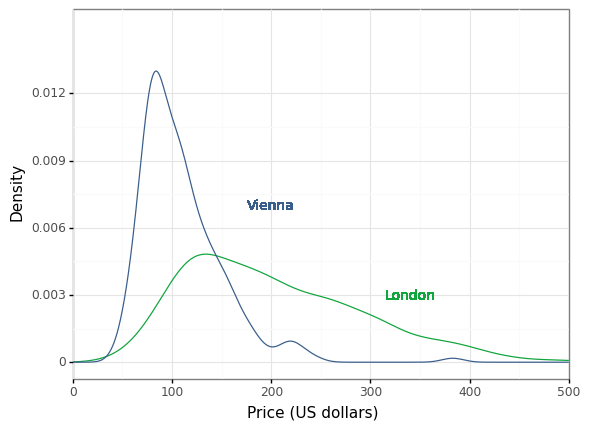

<ggplot: (323019737)>

In [11]:
ggplot(hotels_europe_cut, aes(x="price", y="stat(density)", color="city")) + geom_line(
    stat="density",show_legend='False'
) + labs(x="Price (US dollars)", y="Density", color="") + scale_color_manual(
    name="", values=[color[1], color[0]], labels=["London", "Vienna"]
) + scale_y_continuous(
    limits=[0, 0.015], breaks=seq(0, 0.015, 0.003)
) + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 500], breaks=seq(0, 501, 100)
) + geom_text(
    aes(x=340, y=0.003, label=["London"]), color=color[1], size=10
) + geom_text(
    aes(x=200, y=0.007, label=["Vienna"]), color=color[0], size=10
) + theme_bw()

#### Table 3.6

In [13]:
hotels_europe_cut.groupby("city").agg(
    n=("price", "size"),
    mean=("price", np.mean),
    median=("price", np.median),
    min=("price", min),
    max=("price", max),
    sd=("price", np.std),
    skew=("price", skew),
)

,n,mean,median,min,max,sd,skew
city,,,,,,,
London,435,202.356322,186,49,491,88.128830,0.186
Vienna,207,109.975845,100,50,383,42.221381,0.237
